In [1]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
data_folder_path = Path('../../../data/')
# print(os.listdir(data_folder_path))

In [6]:
data_train = pd.read_csv(data_folder_path / 'final_test.csv')
print(data_train.columns)

Index(['chords', 'simplified_chords', 'decade', 'main_genre',
       'spotify_song_id'],
      dtype='object')


In [7]:
# Check for duplicate rows
print(f"Number of duplicate rows: {data_train.duplicated().sum()}")
print(f"Total rows: {len(data_train)}")

# View the duplicate rows if any exist
if data_train.duplicated().sum() > 0:
    print("\nDuplicate rows:")
    print(data_train[data_train.duplicated(keep=False)])

Number of duplicate rows: 0
Total rows: 45107


In [8]:
# Check for duplicate spotify_song_id values
print(f"Number of duplicate spotify_song_id: {data_train['spotify_song_id'].duplicated().sum()}")
print(f"Total rows: {len(data_train)}")

# View rows with duplicate spotify_song_id if any exist
if data_train['spotify_song_id'].duplicated().sum() > 0:
    duplicates = data_train[data_train['spotify_song_id'].duplicated(keep=False)]
    print(f"\nRows with duplicate spotify_song_id: {len(duplicates)}")
    print(duplicates.sort_values('spotify_song_id'))

Number of duplicate spotify_song_id: 0
Total rows: 45107


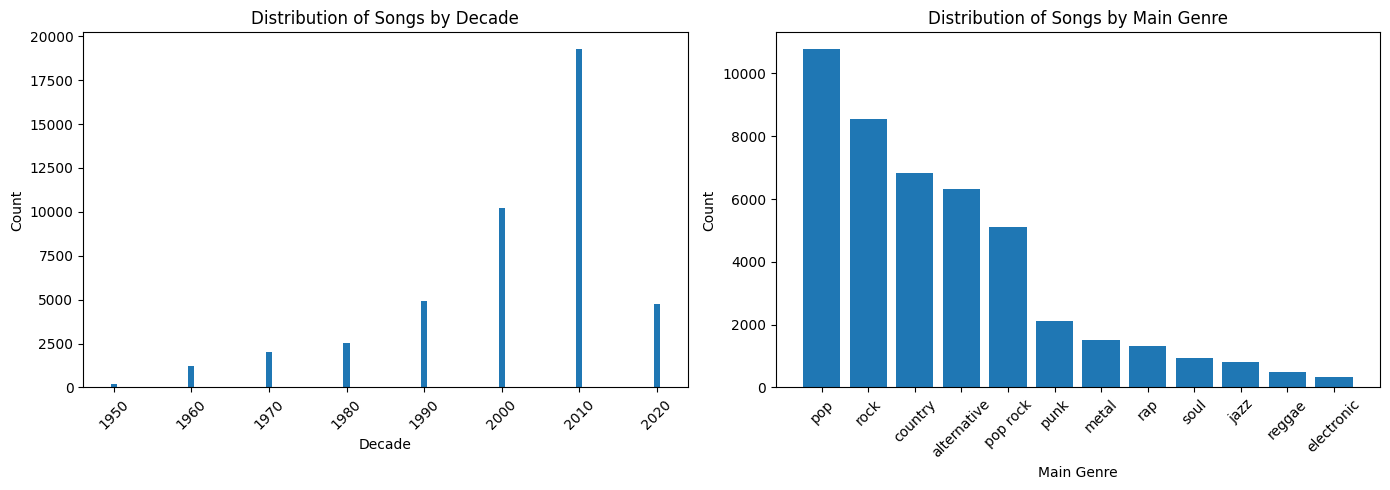

In [10]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot for decade
decade_counts = data_train['decade'].value_counts().sort_index()
axes[0].bar(decade_counts.index, decade_counts.values)
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Songs by Decade')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for main_genre
genre_counts = data_train['main_genre'].value_counts()
axes[1].bar(genre_counts.index, genre_counts.values)
axes[1].set_xlabel('Main Genre')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Songs by Main Genre')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [11]:
data_matrix_expanded = pd.read_csv(data_folder_path / 'matrix_expanded_final_test.csv')
data_density_expanded = pd.read_csv(data_folder_path / 'density_expanded_final_test.csv')
data_spotify = pd.read_csv(data_folder_path / 'spotify_final.csv')

In [12]:
print(data_matrix_expanded.columns)
print(len(data_matrix_expanded))

Index(['chords', 'missing_notes', 'simplified_chords', 'decade', 'drone_ratio',
       'average_overlap', 'main_genre', 'average_2overlap', 'average_3overlap',
       'average_4overlap', 'average_5overlap', 'maj_triad_ratio',
       'min_triad_ratio', 'spotify_song_id'],
      dtype='object')
45107


In [13]:
print(data_density_expanded.columns)
print(len(data_density_expanded))

Index(['chords', 'unique_5gram_density', 'unique_chord_density',
       'simplified_chords', 'decade', 'main_genre', 'spotify_song_id'],
      dtype='object')
45107


In [14]:
# clean spotify data and add prefix to all Spotify columns
data_spotify_drop_index = data_spotify.drop(columns=['Unnamed: 0'])
data_spotify_prefix = data_spotify_drop_index.add_prefix('spotify_')
print(data_spotify_prefix.columns)

Index(['spotify_track_id', 'spotify_artist_id', 'spotify_success',
       'spotify_track_name', 'spotify_artists', 'spotify_album_name',
       'spotify_release_date', 'spotify_popularity', 'spotify_duration_ms',
       'spotify_artist_name', 'spotify_genres', 'spotify_artist_popularity',
       'spotify_followers'],
      dtype='object')


In [15]:
# Merge all four datasets using dot chain
data_merged_all = (data_train
                   .merge(data_matrix_expanded, on='spotify_song_id', how='inner')
                   .merge(data_density_expanded, on='spotify_song_id', how='inner')
                   .merge(data_spotify_prefix, left_on='spotify_song_id', right_on='spotify_track_id', how='left'))

print(f"data_train rows: {len(data_train)}")
print(f"data_matrix_expanded rows: {len(data_matrix_expanded)}")
print(f"data_density_expanded rows: {len(data_density_expanded)}")
print(f"data_spotify rows: {len(data_spotify)}")
print(f"\nMerged dataset rows: {len(data_merged_all)}")
print(f"Rows with Spotify data: {data_merged_all['spotify_track_id'].notna().sum()}")
print(f"Rows without Spotify data (NaN): {data_merged_all['spotify_track_id'].isna().sum()}")
print(f"\nTotal columns: {len(data_merged_all.columns)}")

data_train rows: 45107
data_matrix_expanded rows: 45107
data_density_expanded rows: 45107
data_spotify rows: 215000

Merged dataset rows: 45107
Rows with Spotify data: 32232
Rows without Spotify data (NaN): 12875

Total columns: 37


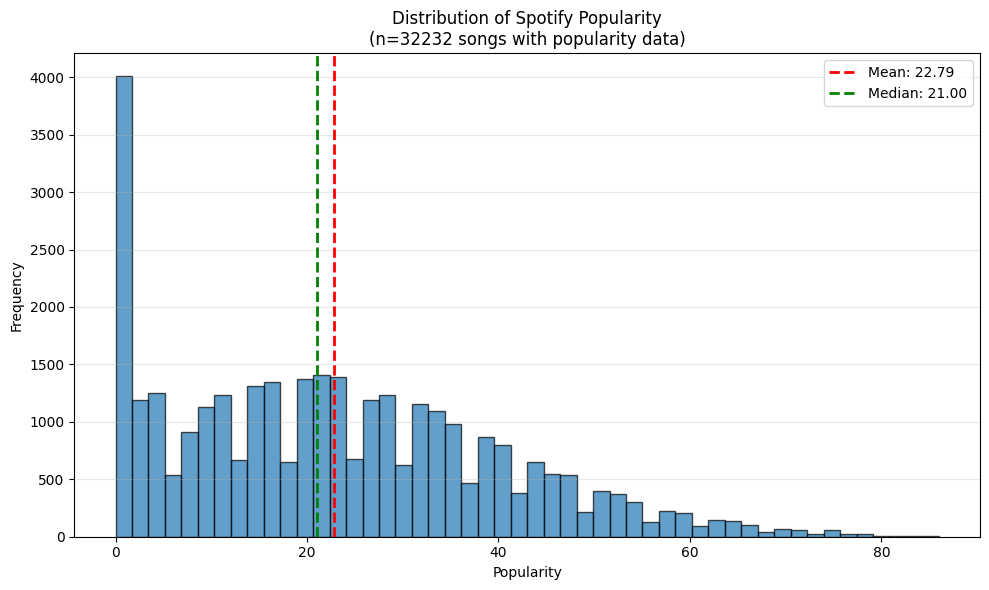

Summary Statistics:
Count: 32232
Mean: 22.79
Median: 21.00
Min: 0.00
Max: 86.00
Std: 17.01


In [16]:
# Create histogram of Spotify popularity (excluding NaN values)
popularity_data = data_merged_all['spotify_popularity'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(popularity_data, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title(f'Distribution of Spotify Popularity\n(n={len(popularity_data)} songs with popularity data)')
plt.grid(axis='y', alpha=0.3)

# Add summary statistics
mean_pop = popularity_data.mean()
median_pop = popularity_data.median()
plt.axvline(mean_pop, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_pop:.2f}')
plt.axvline(median_pop, color='green', linestyle='--', linewidth=2, label=f'Median: {median_pop:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Summary Statistics:")
print(f"Count: {len(popularity_data)}")
print(f"Mean: {mean_pop:.2f}")
print(f"Median: {median_pop:.2f}")
print(f"Min: {popularity_data.min():.2f}")
print(f"Max: {popularity_data.max():.2f}")
print(f"Std: {popularity_data.std():.2f}")

In [17]:
print(data_merged_all.columns)

Index(['chords_x', 'simplified_chords_x', 'decade_x', 'main_genre_x',
       'spotify_song_id', 'chords_y', 'missing_notes', 'simplified_chords_y',
       'decade_y', 'drone_ratio', 'average_overlap', 'main_genre_y',
       'average_2overlap', 'average_3overlap', 'average_4overlap',
       'average_5overlap', 'maj_triad_ratio', 'min_triad_ratio', 'chords',
       'unique_5gram_density', 'unique_chord_density', 'simplified_chords',
       'decade', 'main_genre', 'spotify_track_id', 'spotify_artist_id',
       'spotify_success', 'spotify_track_name', 'spotify_artists',
       'spotify_album_name', 'spotify_release_date', 'spotify_popularity',
       'spotify_duration_ms', 'spotify_artist_name', 'spotify_genres',
       'spotify_artist_popularity', 'spotify_followers'],
      dtype='object')


In [18]:
# Compare the decade columns
existing_decade_cols = ['decade_x', 'decade_y', 'decade']
if len(existing_decade_cols) > 1:
    # Check for equality
    print("\nChecking if decade columns are identical:")
    for i in range(len(existing_decade_cols) - 1):
        col1 = existing_decade_cols[i]
        col2 = existing_decade_cols[i + 1]
        are_equal = data_merged_all[col1].equals(data_merged_all[col2])
        print(f"{col1} == {col2}: {are_equal}")

    # Show value counts for each
    print("\nValue counts for each decade column:")
    for col in existing_decade_cols:
        print(f"\n{col}:")
        print(data_merged_all[col].value_counts().sort_index())

    # Check for any null values
    print("\nNull values:")
    print(data_merged_all[existing_decade_cols].isnull().sum())


Checking if decade columns are identical:
decade_x == decade_y: True
decade_y == decade: True

Value counts for each decade column:

decade_x:
decade_x
1950.0      196
1960.0     1229
1970.0     2034
1980.0     2503
1990.0     4918
2000.0    10238
2010.0    19260
2020.0     4729
Name: count, dtype: int64

decade_y:
decade_y
1950.0      196
1960.0     1229
1970.0     2034
1980.0     2503
1990.0     4918
2000.0    10238
2010.0    19260
2020.0     4729
Name: count, dtype: int64

decade:
decade
1950.0      196
1960.0     1229
1970.0     2034
1980.0     2503
1990.0     4918
2000.0    10238
2010.0    19260
2020.0     4729
Name: count, dtype: int64

Null values:
decade_x    0
decade_y    0
decade      0
dtype: int64


In [19]:
# Check if genre columns are identical
genre_cols = ['main_genre_x', 'main_genre_y', 'main_genre']

print("Checking if genre columns are identical:")
for i in range(len(genre_cols) - 1):
    col1 = genre_cols[i]
    col2 = genre_cols[i + 1]
    are_equal = data_merged_all[col1].equals(data_merged_all[col2])
    print(f"{col1} == {col2}: {are_equal}")

# Show value counts for each
print("\nValue counts for each genre column:")
for col in genre_cols:
    print(f"\n{col}:")
    print(data_merged_all[col].value_counts())

# Check for any null values
print("\nNull values:")
print(data_merged_all[genre_cols].isnull().sum())

Checking if genre columns are identical:
main_genre_x == main_genre_y: True
main_genre_y == main_genre: True

Value counts for each genre column:

main_genre_x:
main_genre_x
pop            10771
rock            8540
country         6842
alternative     6306
pop rock        5116
punk            2121
metal           1514
rap             1317
soul             931
jazz             796
reggae           507
electronic       346
Name: count, dtype: int64

main_genre_y:
main_genre_y
pop            10771
rock            8540
country         6842
alternative     6306
pop rock        5116
punk            2121
metal           1514
rap             1317
soul             931
jazz             796
reggae           507
electronic       346
Name: count, dtype: int64

main_genre:
main_genre
pop            10771
rock            8540
country         6842
alternative     6306
pop rock        5116
punk            2121
metal           1514
rap             1317
soul             931
jazz             796
reggae  

In [20]:
data_merged_all = data_merged_all.drop(columns=['decade_x', 'decade_y', 'main_genre_x', 'main_genre_y'])

In [21]:
# Save merged data to CSV
output_path = data_folder_path / 'data_test_continuous_data.csv'
data_merged_all.to_csv(output_path, index=False)
print(f"Saved merged data to {output_path}")

Saved merged data to ../../data/data_test_continuous_data.csv
